In [1]:
# import some packages
import matplotlib.pyplot as plt

 # Load the Data

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


        # Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [3]:
def load_data(dirname, filename):
    csv_path = os.path.join(dirname, filename)
    return pd.read_csv(csv_path)

train_data = load_data(dirname, "train.csv")

In [4]:
test_data = load_data(dirname, "test.csv")

Let's take a look.

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Brewe, Dr. Arthur Jackson",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Age and Cabin have some missing values. Embarked has a few.

In [8]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Pclass, Age, and Fare look like strongly correlated with Survived(target).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5fd93a7ef0>,
      dtype=object)

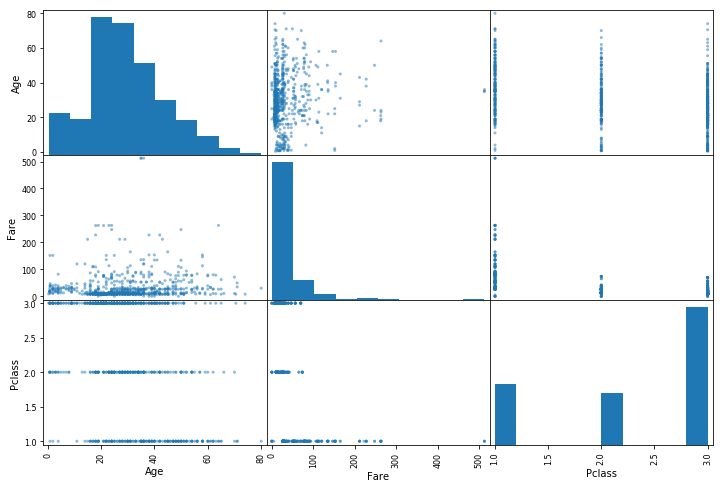

In [9]:
from pandas.plotting import scatter_matrix
attributes = ["Age","Fare","Pclass"]
scatter_matrix(train_data[attributes], figsize=(12,8))

 # Clean the data

### Checking for NaN value

In [10]:
print (train_data.isna().sum()) 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Here, we are going to use the mean as a impute value for NaN in Age.

In [11]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_age = imp_mean.fit_transform(train_data[["Age"]])

In [12]:
train_data["imp_age"]=imputed_age

Do the same thing for the test set.

In [13]:
imputed_age_test = imp_mean.fit_transform(test_data[["Age"]])
test_data["imp_age"]=imputed_age_test

Let's check how many NaN values are in the test set.

In [14]:
print (test_data.isna().sum()) 

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
imp_age          0
dtype: int64


The test data has a NaN value in Fare.
We're going to use the mean to impute it.

In [15]:
imputed_fare = imp_mean.fit_transform(test_data[["Fare"]])

In [16]:
test_data["imp_fare"]=imputed_fare

In [17]:
# from sklearn.base import BaseEstimator, TransformerMixin

# # A class to select numerical or categorical columns 
# # since Scikit-Learn doesn't handle DataFrames yet
# class DataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names = attribute_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names]

In [18]:
# from sklearn.pipeline import Pipeline
# try:
#     from sklearn.impute import SimpleImputer # Scikit-Learn 0.20+
# except ImportError:
#     from sklearn.preprocessing import Imputer as SimpleImputer

# num_pipeline = Pipeline([
#         ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
#         ("imputer", SimpleImputer(strategy="median")),
#     ])
# num_pipeline.fit_transform(train_data)

In [19]:
# num_pipeline.fit_transform(test_data)

# Explore the data 

Let's take a look how the feature affects to the target.

In [20]:
train_data.groupby("Pclass")['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

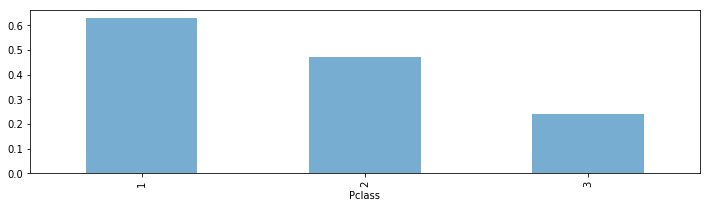

In [21]:
train_data.groupby("Pclass")['Survived'].mean().plot.bar(alpha=0.6, figsize=(12,3))

Pclass 1 has the most survived. 3 was the worst.

In [22]:
train_data.groupby("Embarked")['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Embarked C has the most survived. S was the worst.

In [23]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [24]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


Women are more likely to survive.

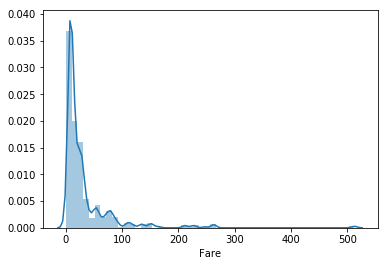

In [25]:
import seaborn as sns
sns.distplot(train_data["Fare"])

We made two data for the exploration.  
train_surv: the training data only for survived.
train_not_surv: the training data only for not survived.

In [26]:
train_surv = train_data.query('Survived == 1')
train_not_surv = train_data.query('Survived == 0')

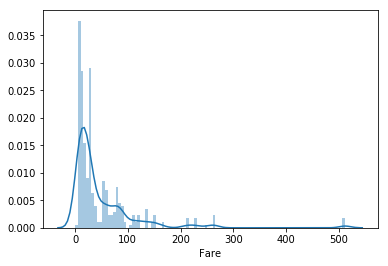

In [27]:
sns.distplot(train_surv["Fare"], 100)

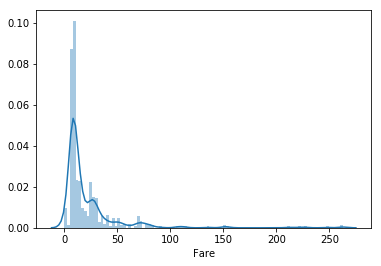

In [28]:
sns.distplot(train_not_surv["Fare"], 100)

There looks like no difference in fare between survived and not survived.

In [29]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# train_data[["Fare"]]=scaler.fit_transform(train_data[["Fare"]])

In [30]:
# sns.distplot(train_data["Fare"])

In [31]:
# test_data[["Fare"]]=scaler.fit_transform(test_data[["Fare"]])

## Using agebucket for the original data

In [32]:
train_data["AgeBucket"] = train_data["imp_age"] // 15 * 15

In [33]:
test_data["AgeBucket"] = test_data["imp_age"] // 15 * 15

In [34]:
y = train_data["Survived"]

In [35]:
from sklearn.ensemble import RandomForestClassifier
features2 = ["Pclass", "Sex", "SibSp", "Parch","Embarked","AgeBucket"]
X2 = pd.get_dummies(train_data[features2])
X_test2 = pd.get_dummies(test_data[features2])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X2, y)
predictions = model.predict(X_test2)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [36]:
# from sklearn.model_selection import cross_val_score
# forest_scores = cross_val_score(model, X2, y, cv=10)
# forest_scores.mean()

without embarked
0.8271873226648507
with embarked
0.8215815457950291

This is the best for now.(w embarked) => This model got 0.79425 for the leaderboard score.

In [37]:
# from sklearn.model_selection import GridSearchCV

# param_grid=[
#     {'n_estimators':[100,1000], 'max_depth':[5,10], 'random_state':[1]},
# ]

# forest_clf = RandomForestClassifier()
# grid_search= GridSearchCV(forest_clf, param_grid, cv=5,scoring='neg_mean_squared_error')
# grid_search.fit(X2, y)

In [38]:
# print("Best Model Parameter: ",grid_search.best_params_)

In [39]:
# y_pred = grid_search.predict(X_test2)

In [40]:
# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_pred})
# output.to_csv('my_submission.csv', index=False)
# print("Your submission was successfully saved!")

In [41]:
# from sklearn.model_selection import cross_val_score
# forest_scores = cross_val_score(grid_search, X2, y, cv=10)
# forest_scores.mean()

This model results in 0.78947 in leaderboard.

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

svc=make_pipeline(StandardScaler(),SVC(random_state=1))
r=[0.0001,0.001,0.1,1,10,50,100]
PSVM=[{'svc__C':r, 'svc__kernel':['linear']},
      {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]
GSSVM=GridSearchCV(estimator=svc, param_grid=PSVM, scoring='accuracy', cv=2)
scores_svm=cross_val_score(GSSVM, X2.astype(float), y,scoring='accuracy', cv=5)

In [43]:
np.mean(scores_svm)

0.8159732986924189

In [44]:
model=GSSVM.fit(X2,y)

In [45]:
pred=model.predict(X_test2)

In [46]:
output=pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':pred})

In [47]:
output.to_csv('submission.csv', index=False)

This is the best score: 0.8159732986924189.
The model from [this notebook](https://www.kaggle.com/goldens/titanic-on-the-top-with-a-simple-model).